<a href="https://colab.research.google.com/github/Pham-Canh-An-Tien/data-mining/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Tien Pham


Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers



Download dataset from Kaggle

In [2]:
! pip install kaggle
from google.colab import files
# Select the kaggle.json file
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download maricinnamon/caltech101-airplanes-motorbikes-schooners
! unzip caltech101-airplanes-motorbikes-schooners.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 62% 9.00M/14.5M [00:00<00:00, 11.2MB/s]
100% 14.5M/14.5M [00:00<00:00, 17.2MB/s]
Archive:  caltech101-airplanes-motorbikes-schooners.zip
  inflating: caltech101_classification/Motorbikes/image_0001.jpg  
  inflating: caltech101_classification/Motorbikes/image_0002.jpg  
  inflating: caltech101_classification/Motorbikes/image_0003.jpg  
  inflating: caltech101_classification/Motorbikes/image_0004.jpg  
  inflating: caltech101_classification/Motorbikes/image_0005.jpg  
  inflating: caltech101_classification/Motorbikes/image_0006.jpg  
  inflating: caltech101_classification/Motorbikes/image_0007.jpg  
  inflating: caltech101_classification/Motorbikes/image_0008.jpg  
  inflating: caltech101_classification/Motorbikes/image_0009.jpg  
  inflating: caltech101_classification/Motorbikes/image_0010.jpg  
  inflating: caltech101_classification/Motorbikes/image_0011.jpg  
  inflating: caltech101_classification/Motorbikes/image_0012.jpg  
  inflating: caltech101_

Training configurations

In [3]:
BATCH_SIZE = 32
EPOCHS = 20
HEIGHT = 224
WIDTH = 224
DATA_DIR = './caltech101_classification'

Load dataset

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATA_DIR,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATA_DIR,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
)

Found 1661 files belonging to 3 classes.
Using 1329 files for training.
Found 1661 files belonging to 3 classes.
Using 332 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['Motorbikes', 'airplanes', 'schooner']

Dataset visualization

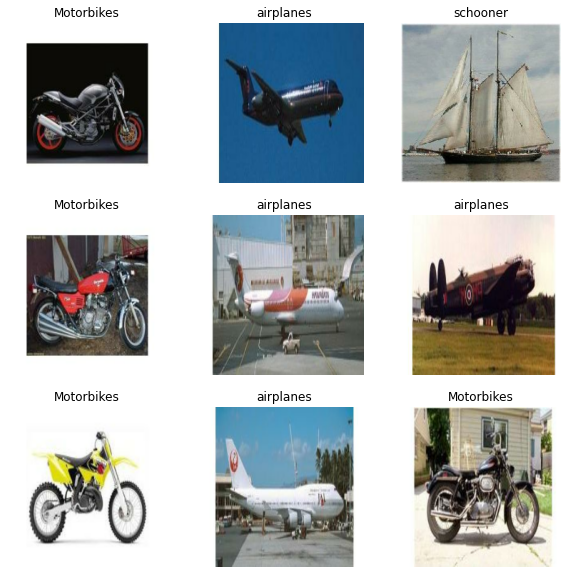

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [8]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
    ])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0

In [10]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS)

Epoch 1/20
42/42 [==============================] - 10s 51ms/step - loss: 0.8972 - accuracy: 0.8608 - val_loss: 0.0448 - val_accuracy: 0.9910
Epoch 2/20
42/42 [==============================] - 1s 32ms/step - loss: 0.0323 - accuracy: 0.9940 - val_loss: 0.0345 - val_accuracy: 0.9880
Epoch 3/20
42/42 [==============================] - 1s 31ms/step - loss: 0.0210 - accuracy: 0.9955 - val_loss: 0.0270 - val_accuracy: 0.9940
Epoch 4/20
42/42 [==============================] - 1s 32ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9970
Epoch 5/20
42/42 [==============================] - 1s 32ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9970
Epoch 6/20
42/42 [==============================] - 1s 31ms/step - loss: 7.8675e-04 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9970
Epoch 7/20
42/42 [==============================] - 1s 34ms/step - loss: 4.8536e-04 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9970
Epoc

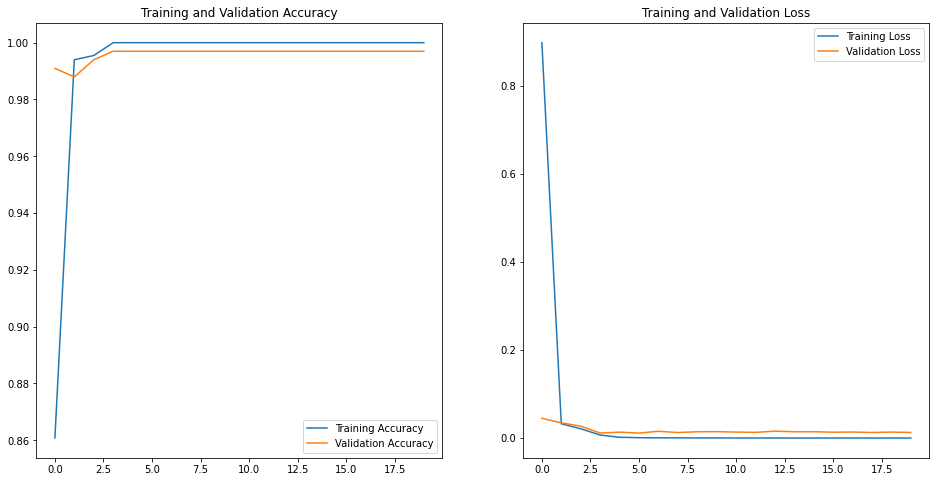

In [11]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Add one more layer to the model**

In [12]:
model1 = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
    ])

In [13]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 64)       

In [14]:
history = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS)

Epoch 1/20
42/42 [==============================] - 2s 40ms/step - loss: 0.4209 - accuracy: 0.8691 - val_loss: 0.1282 - val_accuracy: 0.9548
Epoch 2/20
42/42 [==============================] - 1s 35ms/step - loss: 0.0863 - accuracy: 0.9722 - val_loss: 0.0369 - val_accuracy: 0.9910
Epoch 3/20
42/42 [==============================] - 1s 35ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 4/20
42/42 [==============================] - 1s 35ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0168 - val_accuracy: 0.9910
Epoch 5/20
42/42 [==============================] - 1s 35ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 0.9849
Epoch 6/20
42/42 [==============================] - 1s 35ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0557 - val_accuracy: 0.9880
Epoch 7/20
42/42 [==============================] - 1s 35ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.0231 - val_accuracy: 0.9910
Epoch 8/20
42

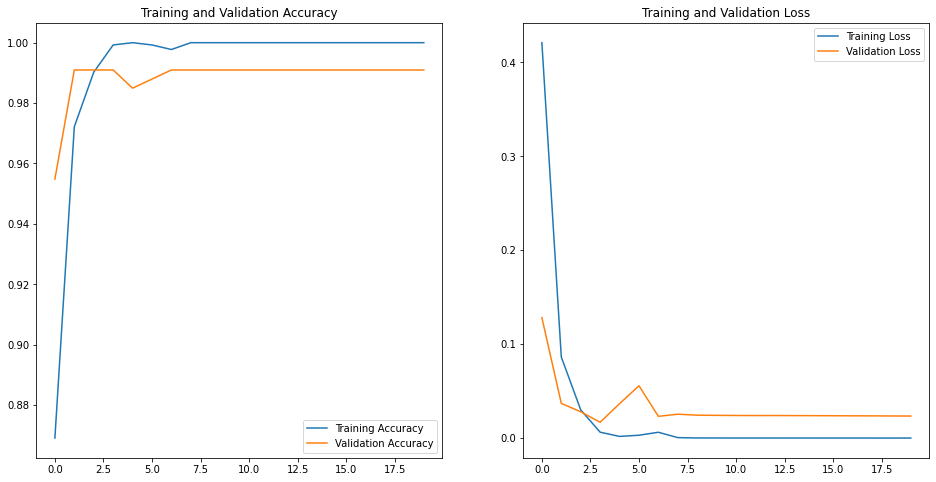

In [15]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Continue to add one more layer**

In [16]:
model2 = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
    ])

In [17]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)       

In [18]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS)

Epoch 1/20
42/42 [==============================] - 2s 42ms/step - loss: 0.4968 - accuracy: 0.7923 - val_loss: 0.1281 - val_accuracy: 0.9608
Epoch 2/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0808 - accuracy: 0.9774 - val_loss: 0.0429 - val_accuracy: 0.9849
Epoch 3/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0465 - accuracy: 0.9887 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 4/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 5/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0291 - val_accuracy: 0.9880
Epoch 6/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.0197 - val_accuracy: 0.9940
Epoch 7/20
42/42 [==============================] - 2s 37ms/step - loss: 0.0586 - accuracy: 0.9797 - val_loss: 0.0460 - val_accuracy: 0.9849
Epoch 8/20
42

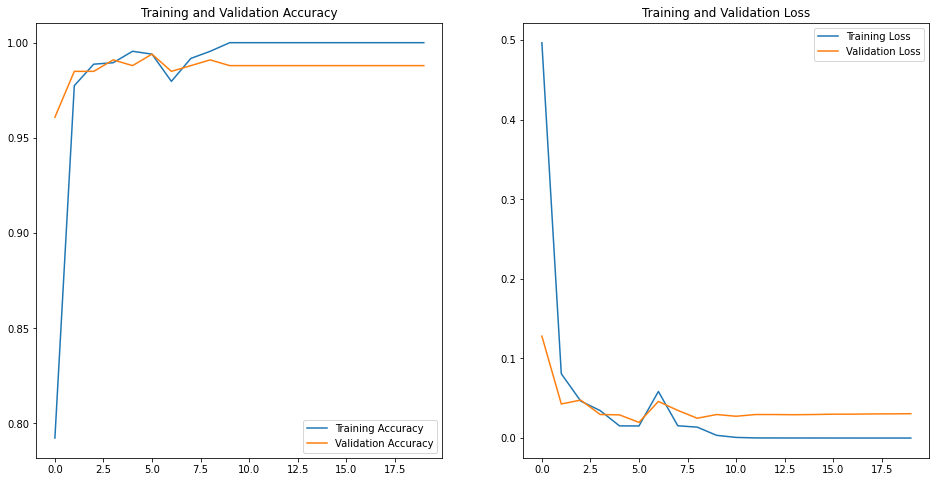

In [19]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Change batch size and epoch

In [20]:
BATCH_SIZE = 64
EPOCHS = 50
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATA_DIR,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATA_DIR,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE
)
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

Found 1661 files belonging to 3 classes.
Using 1329 files for training.
Found 1661 files belonging to 3 classes.
Using 332 files for validation.


In [21]:
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
    ])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 100352)           

In [24]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS)

Epoch 1/50
21/21 [==============================] - 2s 67ms/step - loss: 1.4858 - accuracy: 0.7013 - val_loss: 0.2881 - val_accuracy: 0.9367
Epoch 2/50
21/21 [==============================] - 1s 60ms/step - loss: 0.1441 - accuracy: 0.9601 - val_loss: 0.0427 - val_accuracy: 0.9940
Epoch 3/50
21/21 [==============================] - 1s 60ms/step - loss: 0.0397 - accuracy: 0.9902 - val_loss: 0.0247 - val_accuracy: 0.9940
Epoch 4/50
21/21 [==============================] - 1s 62ms/step - loss: 0.0182 - accuracy: 0.9932 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 1s 62ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9910
Epoch 6/50
21/21 [==============================] - 1s 60ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9970
Epoch 7/50
21/21 [==============================] - 1s 60ms/step - loss: 9.3464e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9970
Epoch 8/5

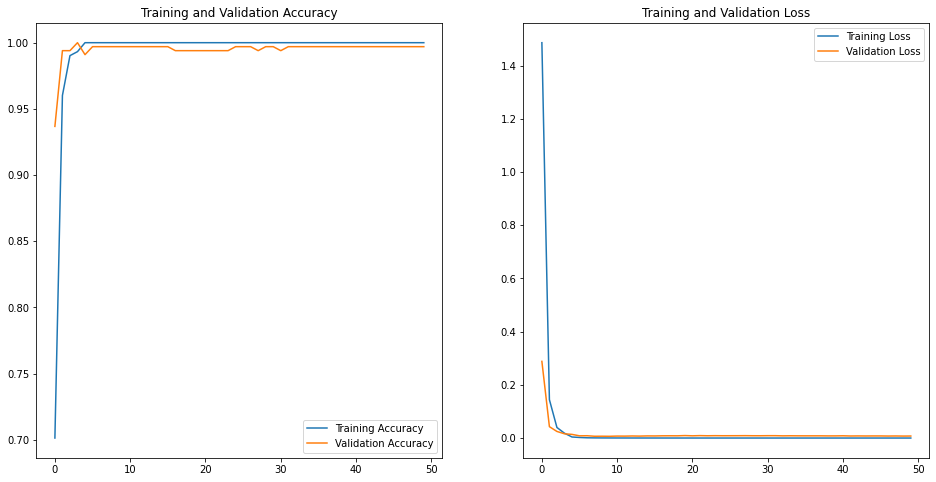

In [25]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Try with data augumentation

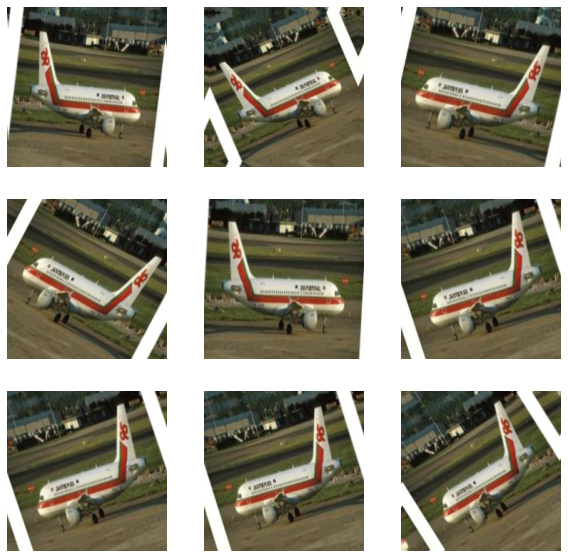

In [46]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(HEIGHT, WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
    ])

image, label = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype('uint8'))
  plt.axis("off")


In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
    ])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [29]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS)

Epoch 1/50
21/21 [==============================] - 3s 96ms/step - loss: 3.6102 - accuracy: 0.5952 - val_loss: 0.3940 - val_accuracy: 0.9217
Epoch 2/50
21/21 [==============================] - 2s 87ms/step - loss: 0.3336 - accuracy: 0.9105 - val_loss: 0.1698 - val_accuracy: 0.9367
Epoch 3/50
21/21 [==============================] - 2s 87ms/step - loss: 0.1912 - accuracy: 0.9375 - val_loss: 0.0756 - val_accuracy: 0.9608
Epoch 4/50
21/21 [==============================] - 2s 87ms/step - loss: 0.1002 - accuracy: 0.9699 - val_loss: 0.0404 - val_accuracy: 0.9880
Epoch 5/50
21/21 [==============================] - 2s 87ms/step - loss: 0.0828 - accuracy: 0.9714 - val_loss: 0.0319 - val_accuracy: 0.9940
Epoch 6/50
21/21 [==============================] - 2s 87ms/step - loss: 0.0641 - accuracy: 0.9767 - val_loss: 0.0188 - val_accuracy: 0.9970
Epoch 7/50
21/21 [==============================] - 2s 90ms/step - loss: 0.0792 - accuracy: 0.9782 - val_loss: 0.0175 - val_accuracy: 0.9940
Epoch 8/50
21

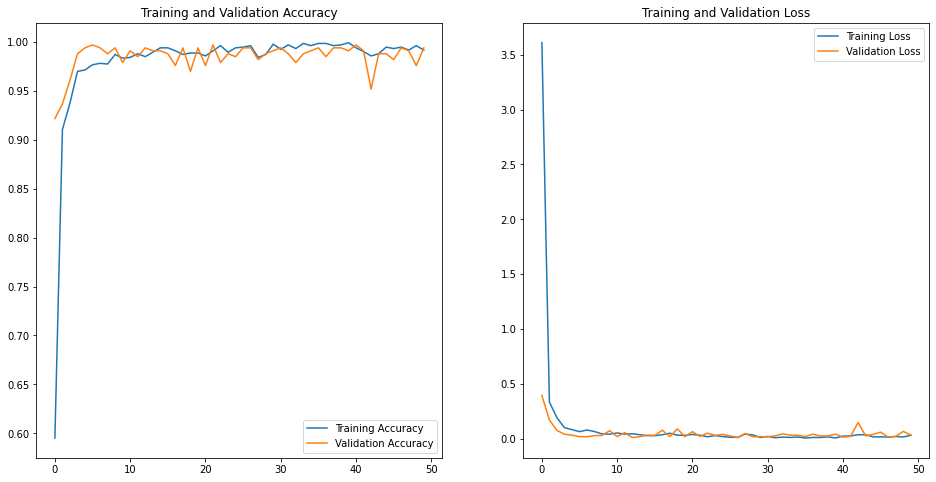

In [30]:
acc = history.history['accuracy']
val_acc =history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()